## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
objects = pd.read_json('../json_dataset/objects.json')

In [3]:
objects

,0
0,person
1,sky
2,building
3,truck
4,bus
5,table
6,shirt
7,chair
8,car
9,train


In [102]:
predicates = pd.read_json('../json_dataset/predicates.json')

In [105]:
predicates_indices = enumerate(predicates[0].tolist())

In [6]:
def return_dataframe(json_file):
    with open(json_file) as f:
        annotations = f.read()
    f.close()
    
    annotations_dict = json.loads(annotations)

    rows_list = []

    for filename, detects in annotations_dict.items():
        for detect in detects:
            predicate = predicates.iloc[detect['predicate']][0]
            object_category = objects.iloc[detect['object']['category']][0]
            object_bbox = detect['object']['bbox']
            subject_category = objects.iloc[detect['subject']['category']][0]
            subject_bbox = detect['subject']['bbox']
            rows_list.append([filename, subject_bbox, subject_category, predicate, object_category, object_bbox])

    return pd.DataFrame(rows_list, columns = ['filename', 'subject_bbox', 'subject_category', 'predicate', 'object_category', 'object_bbox'])

In [7]:
train_annotations_df = return_dataframe('../json_dataset/annotations_train.json')
test_annotations_df = return_dataframe('../json_dataset/annotations_test.json')

In [8]:
train_annotations_df

,filename,subject_bbox,subject_category,predicate,object_category,object_bbox
0,2113966890_c65030a7e7_o.jpg,"[94, 175, 306, 590]",umbrella,above,table,"[336, 489, 324, 458]"
1,2113966890_c65030a7e7_o.jpg,"[94, 175, 306, 590]",umbrella,cover,table,"[336, 489, 324, 458]"
2,2113966890_c65030a7e7_o.jpg,"[265, 397, 539, 680]",chair,under,umbrella,"[94, 175, 306, 590]"
3,2113966890_c65030a7e7_o.jpg,"[265, 397, 539, 680]",chair,by,chair,"[273, 394, 425, 556]"
4,2113966890_c65030a7e7_o.jpg,"[273, 394, 425, 556]",chair,by,chair,"[270, 396, 302, 420]"
5,2113966890_c65030a7e7_o.jpg,"[273, 394, 425, 556]",chair,under,umbrella,"[94, 175, 306, 590]"
6,2113966890_c65030a7e7_o.jpg,"[270, 396, 302, 420]",chair,by,chair,"[272, 401, 159, 293]"
7,2113966890_c65030a7e7_o.jpg,"[272, 401, 159, 293]",chair,by,chair,"[271, 407, 47, 156]"
8,2113966890_c65030a7e7_o.jpg,"[271, 407, 47, 156]",chair,by,chair,"[272, 401, 159, 293]"
9,2113966890_c65030a7e7_o.jpg,"[336, 489, 324, 458]",table,under,umbrella,"[94, 175, 306, 590]"


In [9]:
test_annotations_df

,filename,subject_bbox,subject_category,predicate,object_category,object_bbox
0,5531467160_2ae2cb76d4_b.jpg,"[271, 355, 788, 873]",clock,on,post,"[357, 481, 819, 854]"
1,5531467160_2ae2cb76d4_b.jpg,"[357, 481, 819, 854]",post,has,clock,"[271, 355, 788, 873]"
2,5531467160_2ae2cb76d4_b.jpg,"[537, 718, 5, 913]",bush,in the front of,clock,"[271, 355, 788, 873]"
3,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,has,helmet,"[145, 199, 316, 392]"
4,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,wear,shirt,"[174, 323, 322, 467]"
5,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,wear,shoe,"[427, 478, 157, 203]"
6,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,has,shoes,"[420, 537, 158, 491]"
7,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,has,pants,"[287, 513, 185, 491]"
8,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,wear,pants,"[287, 513, 185, 491]"
9,8646018805_d914413321_b.jpg,"[145, 536, 157, 494]",person,wear,helmet,"[145, 199, 316, 392]"


In [86]:
train_annotations_df[(train_annotations_df.subject_category=='chair') & (train_annotations_df.object_category=='umbrella')]

,filename,subject_bbox,subject_category,predicate,object_category,object_bbox
2,2113966890_c65030a7e7_o.jpg,"[265, 397, 539, 680]",chair,under,umbrella,"[94, 175, 306, 590]"
5,2113966890_c65030a7e7_o.jpg,"[273, 394, 425, 556]",chair,under,umbrella,"[94, 175, 306, 590]"
5289,3762322850_5f263f7efe_b.jpg,"[192, 375, 250, 387]",chair,by,umbrella,"[1, 374, 421, 563]"
11072,4369991970_223d33567f_b.jpg,"[430, 640, 545, 789]",chair,under,umbrella,"[1, 451, 83, 1021]"
16968,4162697083_98311cc10f_b.jpg,"[807, 1013, 294, 532]",chair,under,umbrella,"[354, 997, 275, 762]"
21604,9743704222_601f5a4b30_b.jpg,"[538, 752, 107, 543]",chair,next to,umbrella,"[121, 689, 4, 574]"
21606,9743704222_601f5a4b30_b.jpg,"[464, 620, 584, 799]",chair,next to,umbrella,"[250, 601, 551, 630]"


In [ ]:
# sg_train_annotations_df = return_dataframe('../sg_dataset/sg_train_annotations.json')
# sg_test_annotations_df = return_dataframe('../sg_dataset/sg_test_annotations.json')

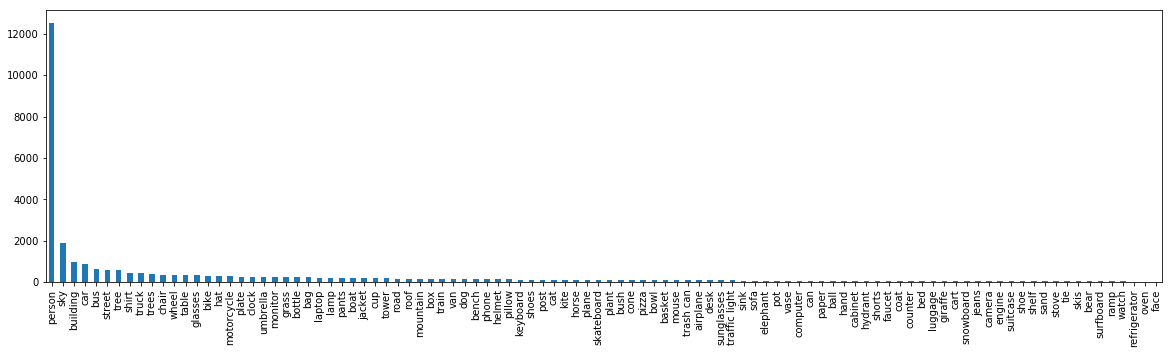

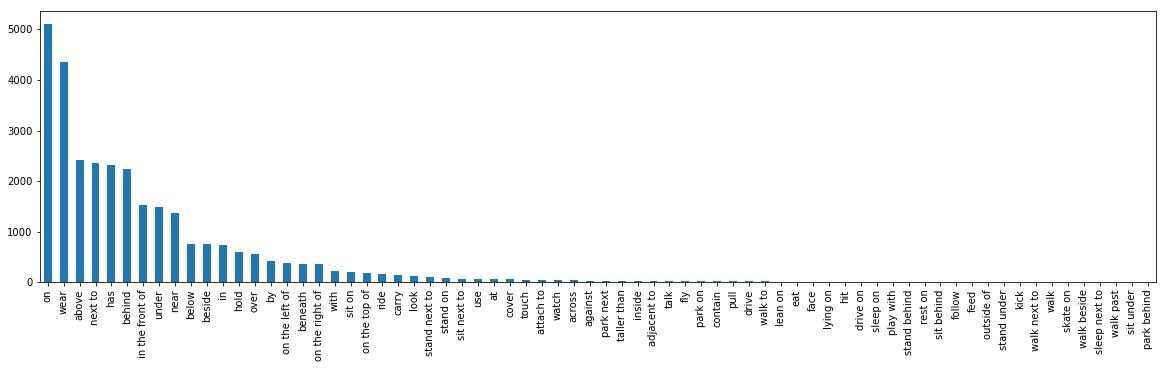

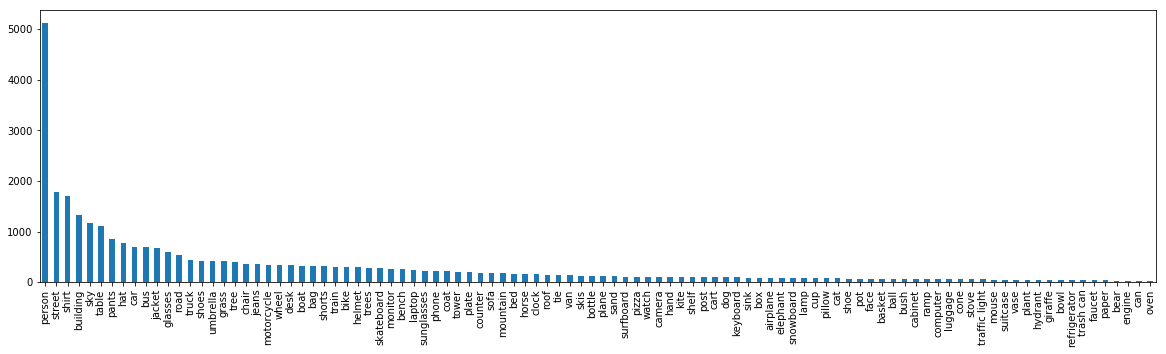

In [105]:
f, ax = plt.subplots(figsize=(20,5)) 

train_anno_subj = train_annotations_df.subject_category.value_counts()
train_anno_subj.plot(x='subject', y='count',kind="bar")
plt.show()

f, ax = plt.subplots(figsize=(20,5)) 

train_anno_pred = train_annotations_df.predicate.value_counts()
train_anno_pred.plot(x='predicate', y='count',kind="bar")
plt.show()

f, ax = plt.subplots(figsize=(20,5)) 

train_anno_obj = train_annotations_df.object_category.value_counts()
train_anno_obj.plot(x='object', y='count',kind="bar")
plt.show()

## Data Subset

In [84]:
new_train_annotations = train_annotations_df
new_test_annotations = test_annotations_df

In [114]:
bad_predicates = [
 'wear',
 'has',
 'in the front of',
 'walk to',
 'walk',
 'walk past',
 'in',
 'hold',
 'with',
 'ride',
 'carry',
 'look',
 'use',
 'at',
 'attach to',
 'cover',
 'touch',
 'watch',
 'against',
 'inside',
 'across',
 'contain',
 'drive',
 'drive on',
 'taller than',
 'eat',
 'park on',
 'lying on',
 'pull',
 'talk',
 'lean on',
 'fly',
 'face',
 'play with',
 'sleep on',
 'outside of',
 'rest on',
 'follow',
 'hit',
 'feed',
 'kick',
 'skate on']

In [26]:
new_test_annotations.size

29454

In [85]:
 for i in bad_predicates:
    new_train_annotations.drop(new_train_annotations[new_train_annotations['predicate'] == i].index, inplace=True)
    new_test_annotations.drop(new_test_annotations[new_test_annotations['predicate'] == i].index, inplace=True)

In [27]:
new_train_annotations.predicate.unique()

array(['above', 'under', 'by', 'behind', 'on', 'next to', 'sit on',
       'near', 'beneath', 'beside', 'on the top of', 'over', 'below',
       'stand next to', 'on the right of', 'stand on', 'on the left of',
       'sit next to', 'sit behind', 'adjacent to', 'park next',
       'sit under', 'walk next to', 'walk beside', 'stand behind',
       'sleep next to', 'stand under', 'park behind'], dtype=object)

In [28]:
new_test_annotations.predicate.unique()

array(['on', 'next to', 'near', 'behind', 'under', 'above', 'below',
       'beneath', 'on the left of', 'beside', 'on the right of',
       'stand next to', 'on the top of', 'by', 'sit on', 'park next',
       'over', 'adjacent to', 'stand on', 'sit next to', 'sit under',
       'park behind', 'stand behind', 'stand under', 'sit behind'],
      dtype=object)

In [97]:
all_predicates = ['on',
 'wear',
 'has',
 'next to',
 'sleep next to',
 'sit next to',
 'stand next to',
 'park next',
 'walk next to',
 'above',
 'behind',
 'stand behind',
 'sit behind',
 'park behind',
 'in the front of',
 'under',
 'stand under',
 'sit under',
 'near',
 'walk to',
 'walk',
 'walk past',
 'in',
 'below',
 'beside',
 'walk beside',
 'over',
 'hold',
 'by',
 'beneath',
 'with',
 'on the top of',
 'on the left of',
 'on the right of',
 'sit on',
 'ride',
 'carry',
 'look',
 'stand on',
 'use',
 'at',
 'attach to',
 'cover',
 'touch',
 'watch',
 'against',
 'inside',
 'adjacent to',
 'across',
 'contain',
 'drive',
 'drive on',
 'taller than',
 'eat',
 'park on',
 'lying on',
 'pull',
 'talk',
 'lean on',
 'fly',
 'face',
 'play with',
 'sleep on',
 'outside of',
 'rest on',
 'follow',
 'hit',
 'feed',
 'kick',
 'skate on',
 'above']

In [98]:
[x for x in all_predicates if x not in bad_predicates]

['on',
 'next to',
 'sleep next to',
 'sit next to',
 'stand next to',
 'park next',
 'walk next to',
 'above',
 'behind',
 'stand behind',
 'sit behind',
 'park behind',
 'under',
 'stand under',
 'sit under',
 'near',
 'below',
 'beside',
 'walk beside',
 'over',
 'by',
 'beneath',
 'on the top of',
 'on the left of',
 'on the right of',
 'sit on',
 'stand on',
 'adjacent to',
 'above']

In [99]:
final_predicates = list(enumerate(['on', 'next to', 'behind', 'under' ]))
final_predicates

[(0, 'on'), (1, 'next to'), (2, 'behind'), (3, 'under')]

## JSON modification

In [106]:
predicate_map = {}
for k,v in predicates_indices:
    predicate_map[k] = v

In [117]:
predicate_map

{0: 'on',
 1: 'wear',
 2: 'has',
 3: 'next to',
 4: 'sleep next to',
 5: 'sit next to',
 6: 'stand next to',
 7: 'park next',
 8: 'walk next to',
 9: 'above',
 10: 'behind',
 11: 'stand behind',
 12: 'sit behind',
 13: 'park behind',
 14: 'in the front of',
 15: 'under',
 16: 'stand under',
 17: 'sit under',
 18: 'near',
 19: 'walk to',
 20: 'walk',
 21: 'walk past',
 22: 'in',
 23: 'below',
 24: 'beside',
 25: 'walk beside',
 26: 'over',
 27: 'hold',
 28: 'by',
 29: 'beneath',
 30: 'with',
 31: 'on the top of',
 32: 'on the left of',
 33: 'on the right of',
 34: 'sit on',
 35: 'ride',
 36: 'carry',
 37: 'look',
 38: 'stand on',
 39: 'use',
 40: 'at',
 41: 'attach to',
 42: 'cover',
 43: 'touch',
 44: 'watch',
 45: 'against',
 46: 'inside',
 47: 'adjacent to',
 48: 'across',
 49: 'contain',
 50: 'drive',
 51: 'drive on',
 52: 'taller than',
 53: 'eat',
 54: 'park on',
 55: 'lying on',
 56: 'pull',
 57: 'talk',
 58: 'lean on',
 59: 'fly',
 60: 'face',
 61: 'play with',
 62: 'sleep on',


In [111]:
train_json = '../json_dataset/annotations_train.json'
test_json = '../json_dataset/annotations_test.json'
new_train_json = '../new_json_dataset/annotations_train.json'
new_test_json = '../new_json_dataset/annotations_test.json'

In [118]:
def cleanup(json_file, new_json_file):
    with open(json_file) as f:
        annotations = f.read()
    f.close()
    
    anno_dict = json.loads(annotations)
    
    for i in anno_dict:
        anno_dict[i] = [j for j in anno_dict[i] if not (predicate_map[j['predicate']] in bad_predicates)]
    
    for i in anno_dict:
        for j in anno_dict[i]:
            if(predicate_map[j['predicate']] in ['on', 'above', 'over', 'on the top of', 'sit on', 'stand on']):
                j['predicate'] = 0
            if(predicate_map[j['predicate']] in ['on the left of', 'on the right of', 'adjacent to', 'beside', 'by', 'walk beside', 'near', 'next to', 'sleep next to', 'sit next to', 'stand next to', 'park next', 'walk next to']):
                j['predicate'] = 1
            if(predicate_map[j['predicate']] in ['behind', 'stand behind', 'sit behind', 'park behind']):
                j['predicate'] = 2
            if(predicate_map[j['predicate']] in ['under', 'beneath', 'below', 'sit under', 'stand under']):
                j['predicate'] = 3
    
    with open(new_json_file, 'w') as fp:
        json.dump(anno_dict, fp)

In [119]:
cleanup(train_json, new_train_json)
cleanup(test_json, new_test_json)